In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/2024 1/ML/Course/1/heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [30]:
hist = px.histogram(df, x='Age', nbins=60)
hist.update_layout(width=500, height=300, title_text='Distribuição por idade')
# hist.update_traces(texttemplate='%{text:.2s}', textposition='outside')
hist.show()

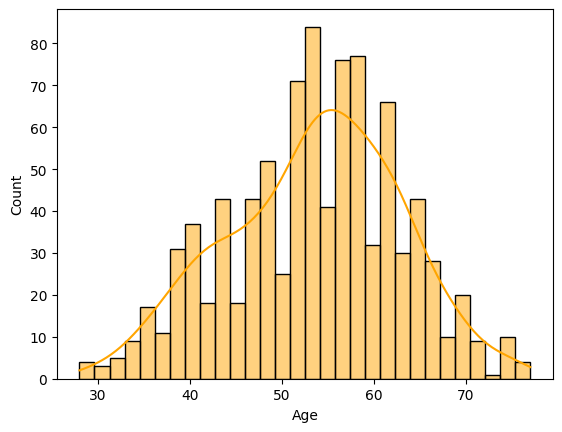

In [31]:
sns.histplot(df, x='Age', bins=30, color='orange', kde=True, stat='count');

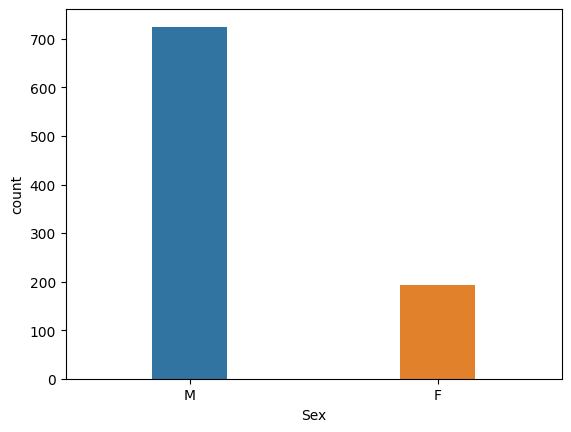

In [45]:
sns.countplot(data=df, x='Sex', width=0.3);

In [48]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

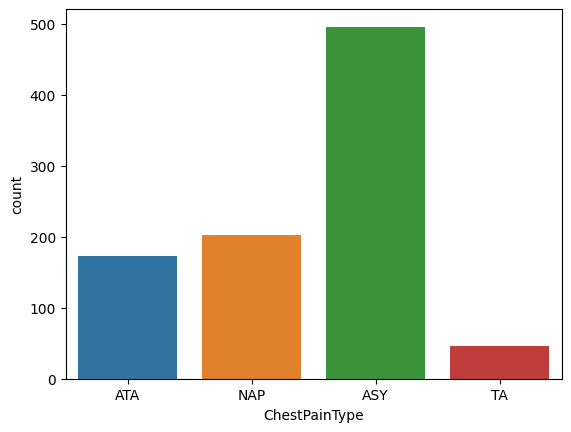

In [52]:
sns.countplot(data=df, x='ChestPainType');

In [54]:
df['RestingBP'].value_counts().sort_index()
# Pressão com valor 0

0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

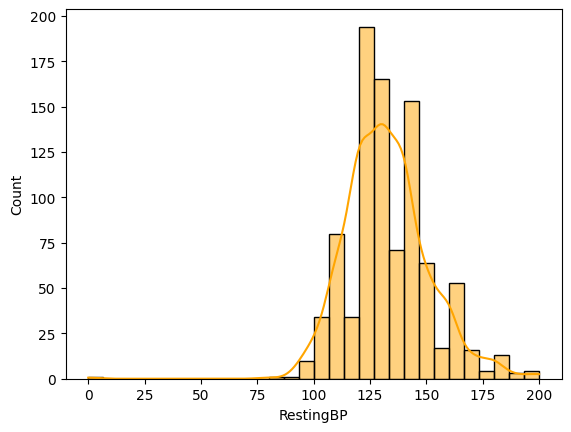

In [57]:
sns.histplot(data=df, x='RestingBP', bins=30, color='orange', kde=True,
             stat='count');

In [58]:
df['Cholesterol'].value_counts().sort_index()
# Cholesterol com valor 0

0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

In [59]:
hist = px.histogram(df, x='Cholesterol', nbins=30)
hist.show()

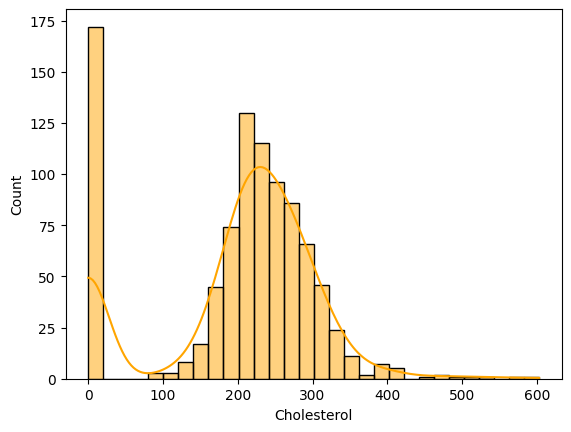

In [62]:
sns.histplot(data=df, x='Cholesterol', bins=30, color='orange', kde=True,
             stat='count');

In [64]:
df['FastingBS'].value_counts().sort_index()
# Não diabéticos  < 120
# Diabéticos      >= 120

0    704
1    214
Name: FastingBS, dtype: int64

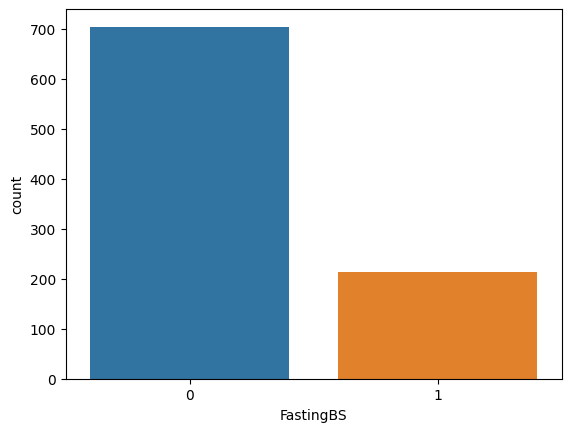

In [66]:
sns.countplot(data=df, x='FastingBS');

In [68]:
df['RestingECG'].value_counts().sort_index()

LVH       188
Normal    552
ST        178
Name: RestingECG, dtype: int64

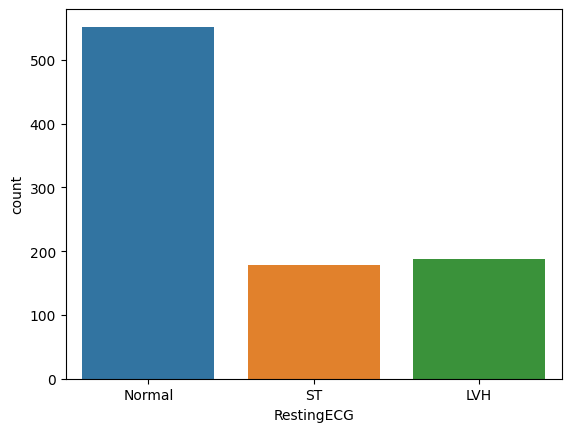

In [70]:
sns.countplot(data=df, x='RestingECG');

In [72]:
df['MaxHR'].value_counts().sort_index()

60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64

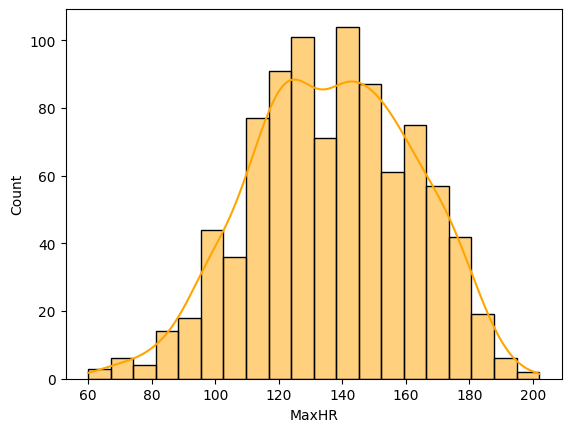

In [74]:
sns.histplot(data=df, x='MaxHR', color='orange', kde=True);

In [76]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [78]:
px.pie(df, df['ExerciseAngina'])

In [79]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

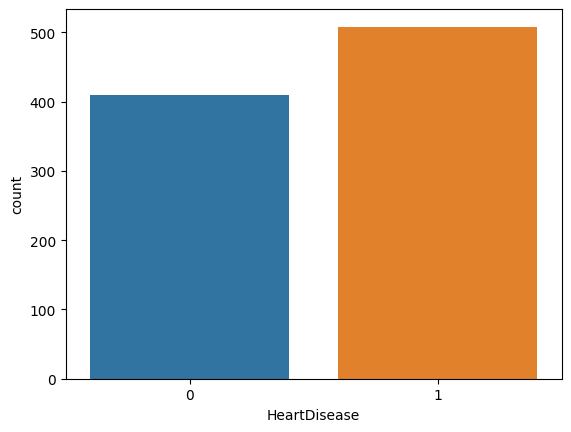

In [83]:
sns.countplot(data=df, x='HeartDisease')

In [84]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Valores NaN

In [86]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [87]:
# SUBSTITUIR VALORES MISSING PELA MÉDIA
df['Age'].fillna(df['Age'].mean(), inplace=True)

# POR QUALQUER OUTRO VALOR
df['Age'].fillna(10, inplace=True)

# Análise Estatíscas Descritivas

In [91]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [90]:
df.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


# Tratando valores incoerentes

In [92]:
df2 = df.loc[df['RestingBP'] != 0]

In [94]:
df2.shape

(917, 12)

In [95]:
df2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Substituindo Colesterol zero por média

In [96]:
df2['Cholesterol'].mean()

199.0163576881134

In [97]:
df2['Cholesterol'].replace(0, np.NaN, inplace=True)
df2.isnull().sum()

<ipython-input-97-98d3baacca92>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [98]:
df2['Cholesterol'].mean()

244.6353887399464

In [101]:
df2['Cholesterol'].fillna(df2['Cholesterol'].mean(), inplace=True)

<ipython-input-101-45c1a4ac304b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [103]:
df2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


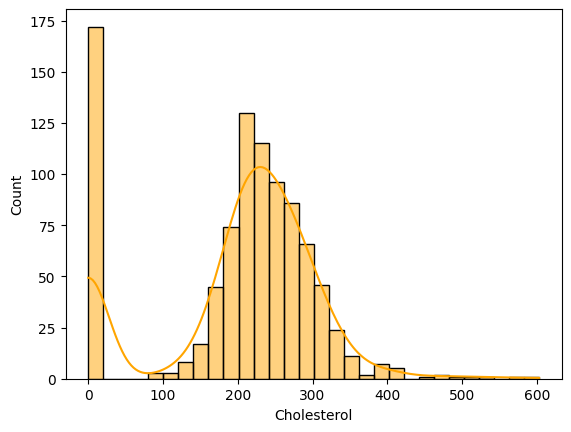

In [104]:
sns.histplot(data=df, x='Cholesterol', bins=30, color='orange', kde=True,
             stat='count');

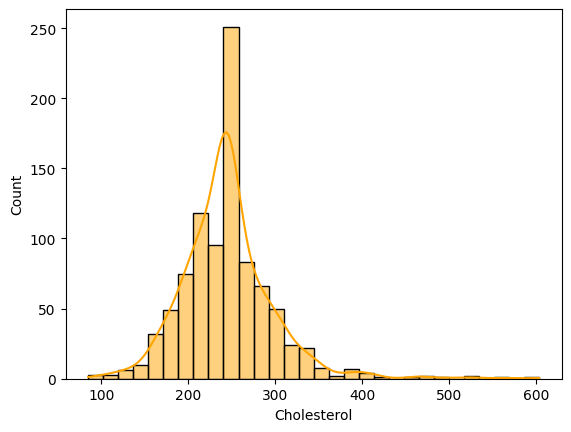

In [106]:
sns.histplot(data=df2, x='Cholesterol', bins=30, color='orange', kde=True,
             stat='count');

Realizando a substituição dos valores 0 em 'Cholesterol' para a média, a MODA mudou para o valor da média.

# Análise de Outliers

In [109]:
px.box(df, y='Age')

In [110]:
px.box(df2, y='RestingBP')

In [111]:
px.box(df2, x='Cholesterol')

In [112]:
px.box(df2, x='MaxHR')

# Exportando

In [113]:
df2.to_csv('heart_tratado.csv', index=False)